In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import re

with open('transfer_stats.json', 'r') as f1:
    transfers = json.load(f1)



df = pd.DataFrame(transfers)
df.tail(40)


,player_id,season,from_id,to_id,from_name,to_name,market_value,fee
64067,264193,2016,9252,24212,Liverpool U23,Birmingham U21,None,Free transfer
64068,264193,2014,6922,9252,Liverpool U18,Liverpool U21,None,None
64069,268527,2022,7123,1218,Maidenhead Utd.,Torquay,None,Free transfer
64070,268527,2020,2796,7123,Woking,Maidenhead Utd.,None,Free transfer
64071,268527,2019,7047,2796,Maidstone,Woking,100000.0,Free transfer
64072,268527,2018,972,7047,Yeovil Town,Maidstone,100000.0,Free transfer
64073,268527,2017,29990,972,West Brom U21,Yeovil Town,100000.0,Free transfer
64074,268527,2017,899,29990,FC Walsall,West Brom U21,100000.0,End of loan
64075,268527,2017,29990,899,West Brom U21,FC Walsall,50000.0,Loan
64076,268527,2016,3696,29990,FC Dag & Red,West Brom U21,50000.0,End of loan


In [3]:
transfers_main = []
for i in transfers:
    match = re.search('\d+', i['fee'])
    if match and i['season'] >= 2017 and i['season'] <= 2021 and i['market_value'] != 'None':
        i['fee'] = int(match.group(0))
        i['market_value'] = int(float(i['market_value']))
        transfers_main.append(i)

df1 = pd.DataFrame(transfers_main)


In [4]:
data = df1.groupby('season').mean()[['market_value', 'fee']].reset_index()
data['market_value'] = data['market_value'].astype(int)
data['fee'] = data['fee'].astype(int)
data

,season,market_value,fee
0,2017,4904788,5919268
1,2018,5795548,5709955
2,2019,7810899,6978752
3,2020,6948582,5821170
4,2021,7299902,5608105


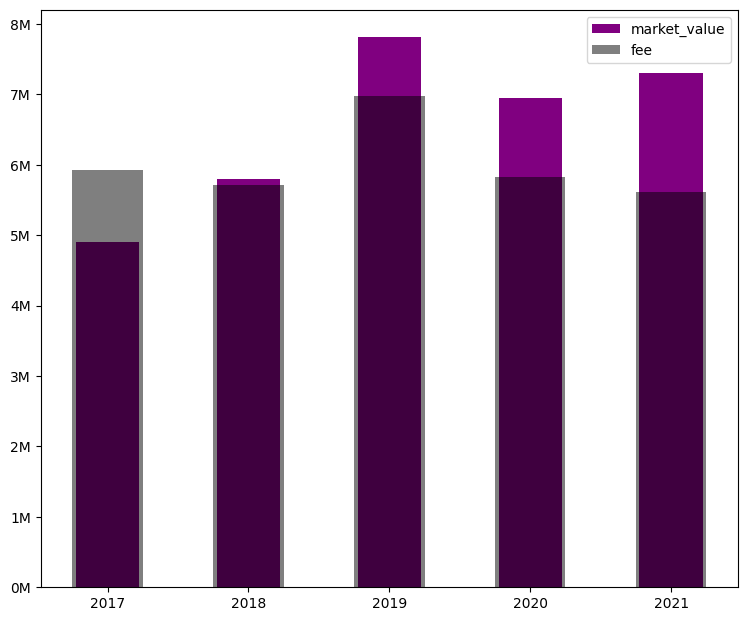

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(9,7.5))
h1 = ax.bar(data['season'], data['market_value'], color= 'purple', alpha = 1, width=0.45, label='market_value')
h2 = ax.bar(data['season'], data['fee'], color= 'black', alpha= 0.5, width=0.5, label='fee')
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x/1000000)

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax.legend()
plt.show()


